## Calibrate for 6 month SPY option

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
from scipy import stats
import pandas as pd
import datetime

options=pd.read_csv('option price_6 month.csv')


def BSM_call_option(St,K,r,t,T,sigma):
# St denotes stock price at time t
# K denotes the maturity price
# r denotes risk-free interest rate
# T denotes maturity time
# sigma denotes volatility
    d1=((r+0.5*sigma**2)*(T-t)+np.log(St/K))/(sigma*np.sqrt(T-t))
    d2=((r-0.5*sigma**2)*(T-t)+np.log(St/K))/(sigma*np.sqrt(T-t))
    return St*stats.norm.cdf(d1)-K*np.exp(-r*(T-t))*stats.norm.cdf(d2)

def BSM_put_option(St,K,r,t,T,sigma):
    d1=((r+0.5*sigma**2)*(T-t)+np.log(St/K))/(sigma*np.sqrt(T-t))
    d2=((r-0.5*sigma**2)*(T-t)+np.log(St/K))/(sigma*np.sqrt(T-t))
    return K*np.exp(-r*(T-t))*stats.norm.cdf(-d2)-St*stats.norm.cdf(-d1)

def plot_generation(vol,options):
#input parameters: vol and options denote volatility and DataFrame
    S0=270
    sigma=vol
    options['Model']=0

    for row,option in options.iterrows():
        Time_diff=(option['Maturity']-option['Date']).days/365.
        options.loc[row,'Model']=BSM_call_option(S0,option['Strike'],option['Rate'],0,Time_diff,sigma)

    #generate plot
    mats=sorted(set(options['Maturity']))
    options=options.set_index('Strike')
    for i,mat in enumerate(mats):
        options[options['Maturity']==mat][['Call','Model']].plot(style=['b-','ro'],title=np.str(mat)[:10],grid=True)
        plt.ylabel('Option value')
        plt.show()
    print("Ongoing")


options['Date']=pd.to_datetime(options['Date'])
options['Maturity']=pd.to_datetime(options['Maturity'])


#dt=options['Maturity']-options['Date']

def error_function(p0):
    global i, min_RSME
    sigma=p0
    S0=270
    se=[]
    for row,option in options.iterrows():
        T=(option['Maturity']-option['Date']).days/365.
        #print(T)

        #print(T)
        error=option['Call']-BSM_call_option(S0,option['Strike'],option['Rate'],0,T,sigma)
        #print(error)
        se.append(error**2)
        #print(len(se))
    
    RMSE=np.sqrt(np.sum(se)/len(se))
    #print('RMSE',RMSE)
    #min_RMSE=min(min_RMSE,RMSE)
    #print(RMSE)
    return RMSE


min_RMSE=500
volatility=sop.fmin(error_function,0.5,maxiter=500,maxfun=750,xtol=0.0001,ftol=0.0001)
print(volatility)

Optimization terminated successfully.
         Current function value: 0.859182
         Iterations: 15
         Function evaluations: 30
[0.13730469]


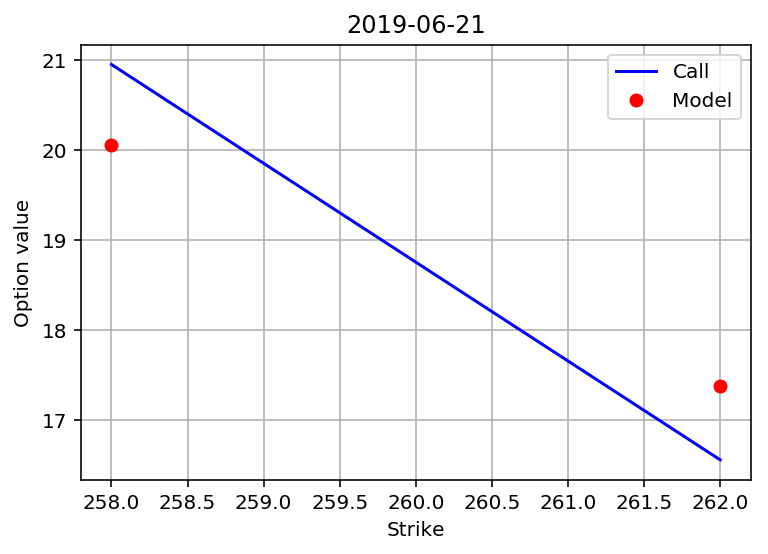

Ongoing


In [2]:
plot_generation(volatility,options)